<a href="https://colab.research.google.com/github/beatricexc/Loan-Prediction/blob/main/Loan_Prediction_Part2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

## 1. Introduction 
###### Overview of the Dataset- the data set contains 250,000 individuals'dta who either payed their loan on time or not indicated by the Risk Flag 

###Questions

    Professions with highest and lowest average income?
    Professions with highest and lowest average age.
    What is the income based on the age?
    What is the experience according to the age?
    What is the income according to profession?
    Do homes with a few years have a higher rental potential than others?
    Is there a relation between marital status and home ownership?
    What is the income based on the experience?
    Average income of Car Owners.
    Average age of married individuals.
    The highest ten professions with the income.


## 2. Data Cleaning 

In [ ]:
def printShapeAndData(panda):
  print(panda.shape)
  display(panda.head(10))
data = pd.read_csv('/content/Training Data.csv')
printShapeAndData(data)

(252000, 13)


,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
5,6,6915937,64,0,single,rented,no,Civil_servant,Jalgaon,Maharashtra,0,12,0
6,7,3954973,58,14,married,rented,no,Librarian,Tiruppur,Tamil_Nadu,8,12,0
7,8,1706172,33,2,single,rented,no,Economist,Jamnagar,Gujarat,2,14,0
8,9,7566849,24,17,single,rented,yes,Flight_attendant,Kota[6],Rajasthan,11,11,0
9,10,8964846,23,12,single,rented,no,Architect,Karimnagar,Telangana,5,13,0


In [ ]:
data.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,223389.000000,2.233890e+05,223389.000000,223389.000000,223388.000000,223388.000000,223388.000000
mean,111695.000000,4.996521e+06,49.953234,10.101281,6.341151,11.996128,0.112956
std,64486.993979,2.877858e+06,17.067452,5.996218,3.643970,1.396666,0.316540
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,55848.000000,2.499276e+06,35.000000,5.000000,4.000000,11.000000,0.000000
50%,111695.000000,5.002101e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,167542.000000,7.475587e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,223389.000000,9.999180e+06,79.000000,20.000000,14.000000,14.000000,1.000000


Train ID si not needed so we will remove it 

In [ ]:
data.drop(columns=['Id'], inplace=True)

Checking for null values 

In [ ]:
pd.isnull(data).sum()

Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [ ]:
df = data.copy()
df

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


Checking Correlation

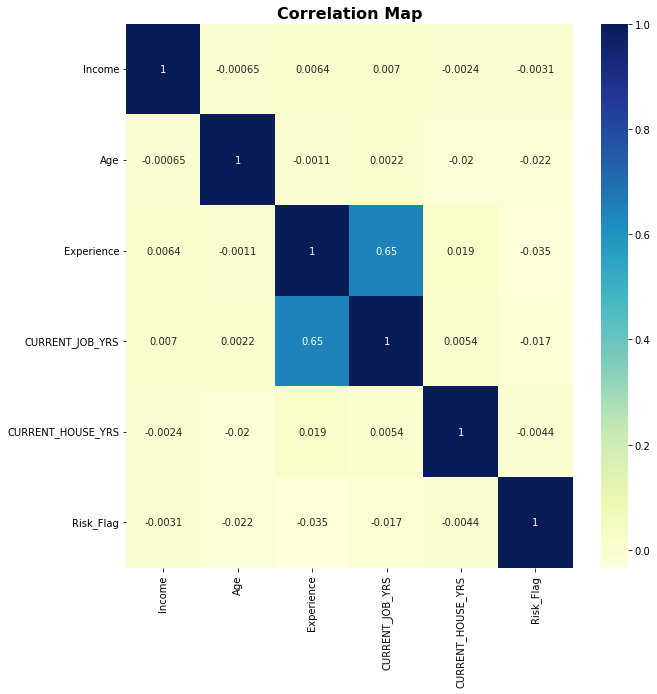

In [ ]:
Cor=data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), cmap='YlGnBu', annot = True)
plt.title("Correlation Map", fontweight = "bold", fontsize=16)
plt.show()

Changing Married and Single to 1 and 0 and Car_Ownership Yes = 1 and no = 0 

In [ ]:
df["Married/Single"]= pd.Series(np.where(df["Married/Single"].values =='married', 1, 0), df.index)
df["Car_Ownership"]= pd.Series(np.where(df["Car_Ownership"].values =='yes', 1, 0), df.index)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


## 3. Exploratory Data Analysis

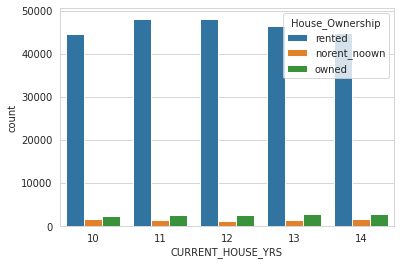

In [ ]:
# 6 Do homes with a few years have higher rental potential than otthers?

sns.set_style('whitegrid')
sns.countplot(x='CURRENT_HOUSE_YRS', data = data, hue = 'House_Ownership')
plt.show()

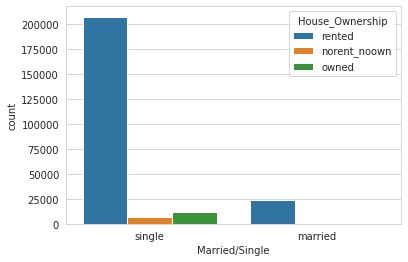

In [ ]:
#7. Is there a relation between marital status and home ownership?
sns.set_style('whitegrid')
sns.countplot(x='Married/Single' ,data = data , hue = 'House_Ownership')
plt.show()

In [ ]:
df['Profession'].unique()

array(['Mechanical_engineer', 'Software_Developer', 'Technical_writer',
       'Civil_servant', 'Librarian', 'Economist', 'Flight_attendant',
       'Architect', 'Designer', 'Physician', 'Financial_Analyst',
       'Air_traffic_controller', 'Politician', 'Police_officer', 'Artist',
       'Surveyor', 'Design_Engineer', 'Chemical_engineer',
       'Hotel_Manager', 'Dentist', 'Comedian', 'Biomedical_Engineer',
       'Graphic_Designer', 'Computer_hardware_engineer',
       'Petroleum_Engineer', 'Secretary', 'Computer_operator',
       'Chartered_Accountant', 'Technician', 'Microbiologist',
       'Fashion_Designer', 'Aviator', 'Psychologist', 'Magistrate',
       'Lawyer', 'Firefighter', 'Engineer', 'Official', 'Analyst',
       'Geologist', 'Drafter', 'Statistician', 'Web_designer',
       'Consultant', 'Chef', 'Army_officer', 'Surgeon', 'Scientist',
       'Civil_engineer', 'Industrial_Engineer', 'Technology_specialist'],
      dtype=object)

In [ ]:
def MinAndMax(dataframe, column, column2):
    #Getting Max Value
    high = dataframe[column].idxmax()
    high_data = pd.DataFrame(df.loc[high])
    #Getting Min Value
    low = dataframe[column].idxmin()
    low_data = pd.DataFrame(df.loc[low])
    dataMinMax = pd.concat([high_data, low_data], axis=1) #creating a table for the detail of both columns
    sChigh = dataMinMax[high][column2]
    sClow = dataMinMax[low][column2]
    return print("The lowest and highest in {} are: {} and {} and their {}s are {} and {}".format(column,low,high,column2,sChigh, sClow)), dataMinMax

    

In [ ]:
#1.Professions with highest and lowest average income.
MinAndMax(df, 'Income','Profession')



The lowest and highest in Income are: 256 and 229019 and their Professions are Police_officer and Engineer


(None,                            229019       256   
 Income                    9999938        10310
 Age                            34           70
 Experience                     19           20
 Married/Single                  0            0
 House_Ownership            rented       rented
 Car_Ownership                   0            0
 Profession         Police_officer     Engineer
 CITY                    Panchkula    Baranagar
 STATE                     Haryana  West_Bengal
 CURRENT_JOB_YRS                 6            7
 CURRENT_HOUSE_YRS              13           14
 Risk_Flag                       0            0)

In [ ]:
#2.Professions with highest and lowest average age.
MinAndMax(df, 'Age','Profession')



The lowest and highest in Age are: 32 and 67 and their Professions are Air_traffic_controller and Computer_hardware_engineer


(None,                                        67                          32
 Income                            9576258                     4128828
 Age                                    79                          21
 Experience                             18                          10
 Married/Single                          0                           0
 House_Ownership                    rented                      rented
 Car_Ownership                           0                           0
 Profession         Air_traffic_controller  Computer_hardware_engineer
 CITY                           Jamshedpur                     Khammam
 STATE                           Jharkhand                   Telangana
 CURRENT_JOB_YRS                         6                          10
 CURRENT_HOUSE_YRS                      11                          12
 Risk_Flag                               0                           0)

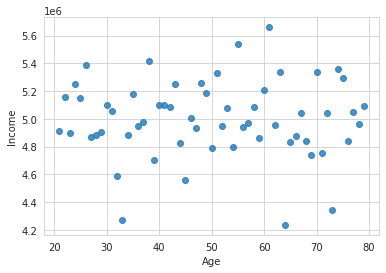

In [ ]:
#3.What is the income based on the age?
q=df.groupby('Age', as_index=False)['Income'].mean()
q.Income= round (q.Income,1)

sns.regplot(data = q, x = 'Age', y = 'Income', fit_reg = False); 

plt.xlabel('Age');
plt.ylabel('Income');

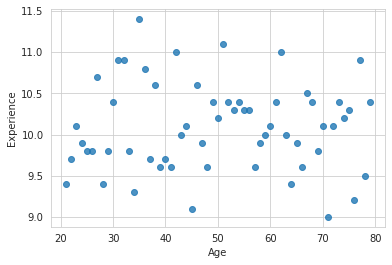

In [ ]:
#4.What is the experience according to the age?
w= df.groupby('Age', as_index=False)['Experience'].mean()
w.Experience= round (w.Experience,1)

sns.regplot(data = w, x = 'Age', y = 'Experience', fit_reg = False); 

plt.xlabel('Age');
plt.ylabel('Experience');



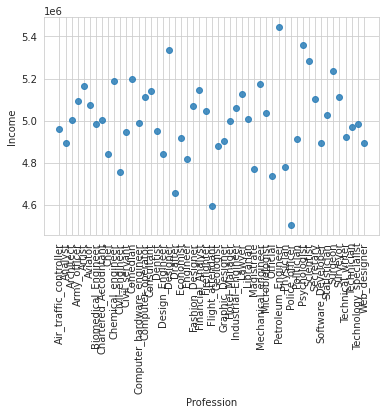

In [ ]:
#5. What is the income according to profession?
z=df.groupby('Profession', as_index=False)['Income'].mean()
z.Income= round (z.Income,1)

sns.regplot(data = z, x = 'Profession', y = 'Income', fit_reg = False); 
plt.xticks(rotation= 90)
plt.xlabel('Profession');
plt.ylabel('Income');



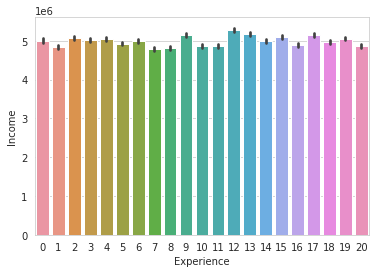

In [ ]:
#8. what is the income based on the experience?
sns.barplot(x ='Experience', y ='Income', data = data)
plt.show()